# BIG MARKET SALES PREDICTION

## Sales Prediction for Big Mart Outlets:

* The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and predict the sales of each product at a particular outlet.

* Using this model, BigMart will try to understand the properties of products and outlets which play a key role in increasing sales.

* Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly. 

## DATA DICTIONARY:

### Train file: CSV containing the item outlet information with sales value

* Variable	                 --   Description
* Item_Identifier	             --   Unique product ID
* Item_Weight	                 --   Weight of product
* Item_Fat_Content	         --   Whether the product is low fat or not
* Item_Visibility	             --   The % of total display area of all products in a store allocated to the particular product
* Item_Type	                 --   The category to which the product belongs
* Item_MRP	                 --   Maximum Retail Price (list price) of the product
* Outlet_Identifier	         --   Unique store ID
* Outlet_Establishment_Year	 --   The year in which store was established
* Outlet_Size	                 --   The size of the store in terms of ground area covered
* Outlet_Location_Type	     --   The type of city in which the store is located
* Outlet_Type	                 --   Whether the outlet is just a grocery store or some sort of supermarket
* Item_Outlet_Sales	         --   Sales of the product in the particular store. This is the outcome variable to be predicted.

### Test file: CSV containing item outlet combinations for which sales need to be forecasted

* Variable                    --     	Description
* Item_Identifier             --    	Unique product ID
* Item_Weight	              --          Weight of product
* Item_Fat_Content	          --      Whether the product is low fat or not
* Item_Visibility	          --          The % of total display area of all products in a store allocated to the particular product
* Item_Type	                  --      The category to which the product belongs
* Item_MRP	                  --      Maximum Retail Price (list price) of the product
* Outlet_Identifier	          --      Unique store ID
* Outlet_Establishment_Year	  --      The year in which store was established
* Outlet_Size	              --          The size of the store in terms of ground area covered
* Outlet_Location_Type	      --      The type of city in which the store is located
* Outlet_Type	              --          Whether the outlet is just a grocery store or some sort of supermarket

### Submission file format

* Variable	                  --      Description
* Item_Identifier	          --          Unique product ID
* Outlet_Identifier	          --      Unique store ID
* Item_Outlet_Sales	          --      Sales of the product in the particular store. This is the outcome variable to be predicted.

## IMPORTING THE RELEVANT LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [2]:
# SET THE DATA TO A VARIABLE:
data = pd.read_csv("train.csv")

In [3]:
# VIEW THE HEAD OF THE DATA:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
# VIEW THE SHAPE OF THE DATA:
data.shape

(8523, 12)

In [5]:
# AGGREGATE THE DATA:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [6]:
# INFORMATION ABOUT THE DATA:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
# COLLECTION THE COLUMNS CONTAINS OBJECT DTYPE:
obj_col = []
for label,content in data.items():
    if not pd.api.types.is_numeric_dtype(content):
        obj_col.append(label)
        print(obj_col)

['Item_Identifier']
['Item_Identifier', 'Item_Fat_Content']
['Item_Identifier', 'Item_Fat_Content', 'Item_Type']
['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier']
['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size']
['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type']
['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


In [8]:
# REMOVING UNWANTED COLUMNS:
obj_col.remove("Item_Identifier")
obj_col.remove('Outlet_Identifier')

In [9]:
# PRINT THE VALUE_COUNTS OF THE CATEGORICAL DATA
for col in obj_col:
    print(col)
    print(data[col].value_counts())
    print()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Outlet_Size
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int6

In [10]:
# REPLACE THE INFORMATION WITH MORE VALUABLE FORMAT:
data["Item_Fat_Content"] = data["Item_Fat_Content"].replace({"LF" : "Low Fat", "reg" : "Regular", "low fat" : "Low Fat"})
data["Item_Fat_Content"].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [11]:
# COLLECT THE MEAN OF THE DATA USING PIVOT TABLE :
mean_item_weight = data.pivot_table(values = "Item_Weight", index = "Item_Identifier")
mean_item_weight

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [12]:
# ASSIGN A VARIABLE TO SAVE MISSING VALUES:
missing_value = data["Item_Weight"].isnull()
missing_value

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Item_Weight, Length: 8523, dtype: bool

In [13]:
# REPLACE THE MISSING VALUES WITH MEAN:
for i,item in enumerate(data["Item_Identifier"]):
    if missing_value[i]:
        if item in mean_item_weight:
            data["Item_Weight"][i] = data["Item_Weight"].loc[item]["Item_Weight"]
        else:
            data["Item_Weight"][i] = np.mean(data["Item_Weight"])

In [14]:
# CHECK IS THERE IS A NULL VALUE:
data["Item_Weight"].isnull().sum()

0

In [15]:
# COLLECT THE MODE OF THE CATEGORICAL DATA:
mode_outlet_size = data.pivot_table(values = "Outlet_Size", columns = "Outlet_Type", aggfunc = (lambda x: x.mode()))
mode_outlet_size

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [16]:
# ASSIGN MISSING VALUES TO A VARIABLE:
missing_cat_values = data["Outlet_Size"].isnull()
missing_cat_values

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [17]:
# FILL THE MISSING VALUES WITH MODE:
data.loc[missing_cat_values, "Outlet_Size"] = data.loc[missing_cat_values, "Outlet_Type"].apply(lambda x: mode_outlet_size[x])

In [18]:
# CHECK IF THERE IS A MISSING DATA
data["Outlet_Size"].isnull().sum()

0

In [19]:
# CHECK FOR THE 0'S IN iTEM_vARIABILITY COLUMN:
sum(data["Item_Visibility"] == 0)

526

In [20]:
# FILL THE COLUMN 0'S WITH MEAN:
data.loc[:, "Item_Visibility"].replace([0], data["Item_Visibility"].mean(), inplace = True)
sum(data["Item_Visibility"] == 0)

0

In [21]:
# SUBSET THE iTEM_iDENTIFIER COLUMN FOR BETTER UNDERSTANDING:
data["New_type_item"] = data["Item_Identifier"].apply(lambda x: x[:2])
data["New_type_item"]

0       FD
1       DR
2       FD
3       FD
4       NC
        ..
8518    FD
8519    FD
8520    NC
8521    FD
8522    DR
Name: New_type_item, Length: 8523, dtype: object

In [22]:
# ABBREVATE THE NAMES AND REPLACE IT TO A NEW COLUMN: 
data["New_type_item"] = data["New_type_item"].replace({"FD" : "Food", "DR" : "Drinks", "NC" : "Non-Consumable"})
data["New_type_item"]

0                 Food
1               Drinks
2                 Food
3                 Food
4       Non-Consumable
             ...      
8518              Food
8519              Food
8520    Non-Consumable
8521              Food
8522            Drinks
Name: New_type_item, Length: 8523, dtype: object

In [23]:
# SET THE CATEGORICAL PART OF THE DATA TO LOOK MORE INSIGHTIVE:
data.loc[data["New_type_item"] == "Non-Consumable", "Item_Fat_Content"] = "Non-Edible"
data["Item_Fat_Content"].value_counts()

Low Fat       3918
Regular       3006
Non-Edible    1599
Name: Item_Fat_Content, dtype: int64

In [24]:
# REDUCE THE SIZE OF THE YEAR VALUE IN ORDER THAT THE MACHINE CAN LEARN EASILY AND TO REDUCE ERROR:
data["Outlet_Year"] = 2013 - data["Outlet_Establishment_Year"]
data["Outlet_Year"]

0       14
1        4
2       14
3       15
4       26
        ..
8518    26
8519    11
8520     9
8521     4
8522    16
Name: Outlet_Year, Length: 8523, dtype: int64

In [25]:
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_type_item,Outlet_Year
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food,14
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,4
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food,14
3,FDX07,19.200,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,Food,15
4,NCD19,8.930,Non-Edible,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,Food,26
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Small,Tier 2,Supermarket Type1,549.2850,Food,11
8520,NCJ29,10.600,Non-Edible,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,Non-Consumable,9
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,Food,4


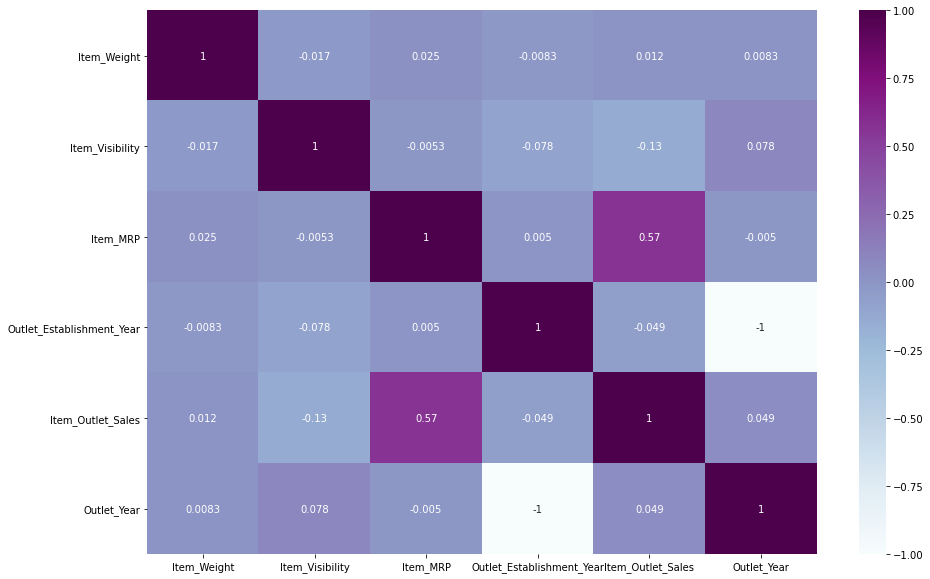

In [26]:
# PLOT THE CORRELATION MATRIX OF THE DATA:
corr = data.corr()
plt.figure(figsize = (15,10))
sns.heatmap(data = corr, annot = True, cmap = "BuPu")
plt.show()

## VISUALIZE THE NUMERIC DATA WITH DISTPLOT:

<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

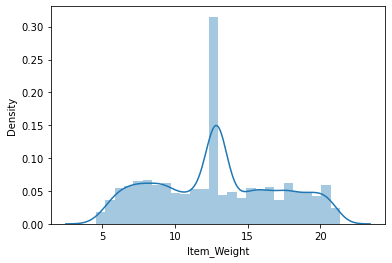

In [27]:
sns.distplot(data["Item_Weight"])

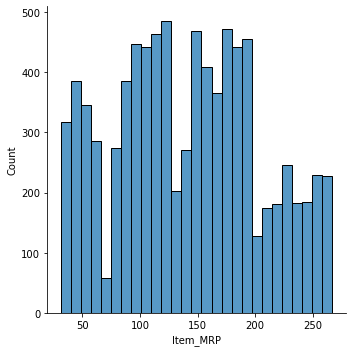

In [28]:
sns.displot(data["Item_MRP"])

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

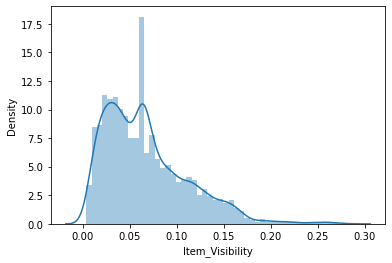

In [29]:
# IN ORDER TO AVOID LEFT SKEWNESS, WE NEED TO NORMALIZE THE DATA WITH LOG:
data["Item_Visibility"] = np.log(1+data["Item_Visibility"])
sns.distplot(data["Item_Visibility"])

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

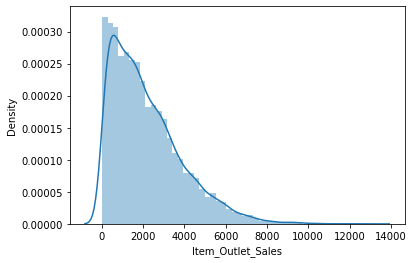

In [30]:
sns.distplot(data["Item_Outlet_Sales"])

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

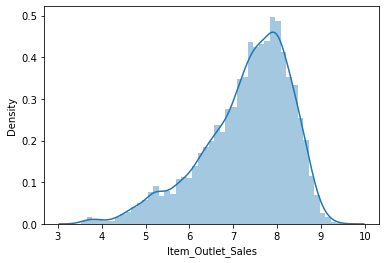

In [31]:
data["Item_Outlet_Sales"] = np.log(1+data["Item_Outlet_Sales"])
sns.distplot(data["Item_Outlet_Sales"])

## VISUALIZE THE CATEGORICAL WITH COUNT PLOT:

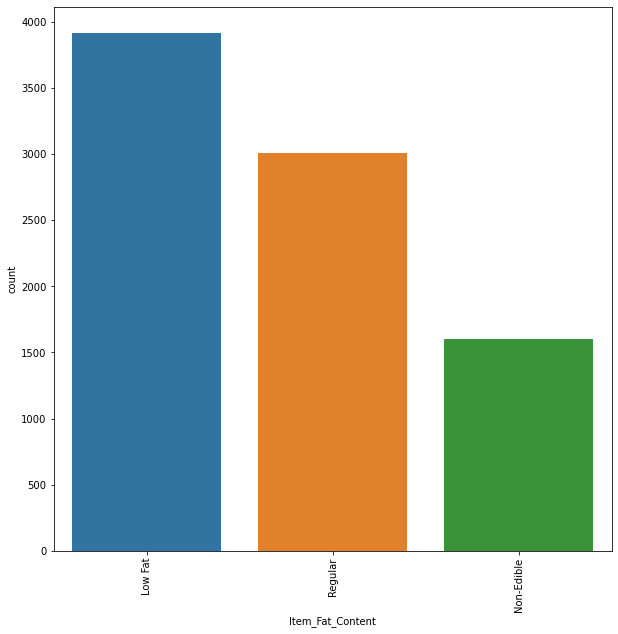

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

In [32]:
# ASSING A FUNCTION TO DISPLAY THE PLOT EASILY:
def countplot(a):
    plt.figure(figsize=(10,10))
    plt.xticks(rotation = 90)
    plot = sns.countplot(a)
    plt.show()
    return plot

a = data["Item_Fat_Content"]
countplot(a)

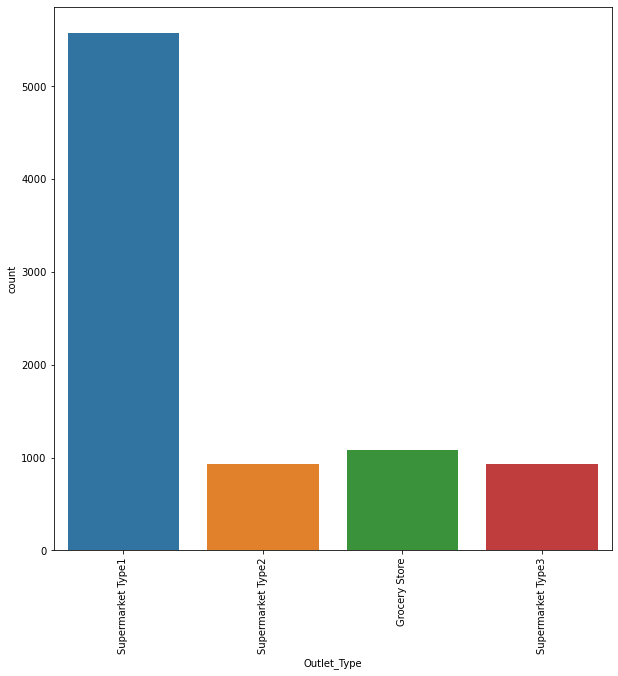

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

In [33]:
countplot(data["Outlet_Type"])

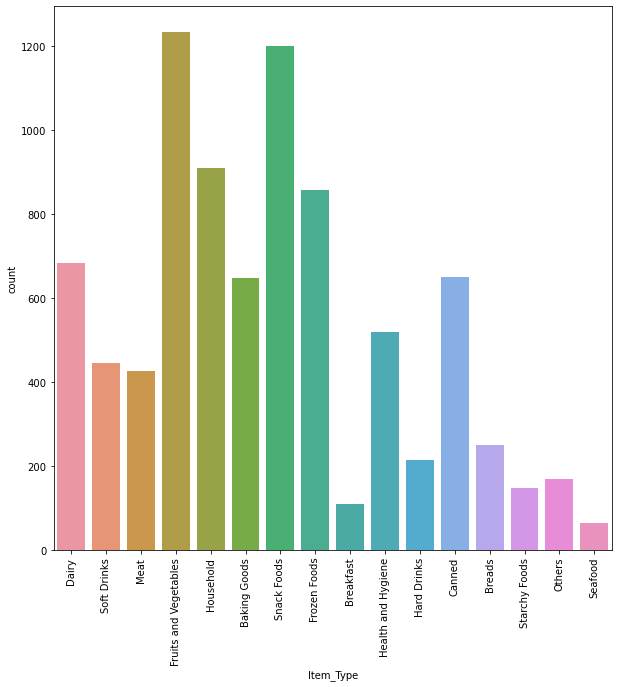

<AxesSubplot:xlabel='Item_Type', ylabel='count'>

In [34]:
countplot(data["Item_Type"])

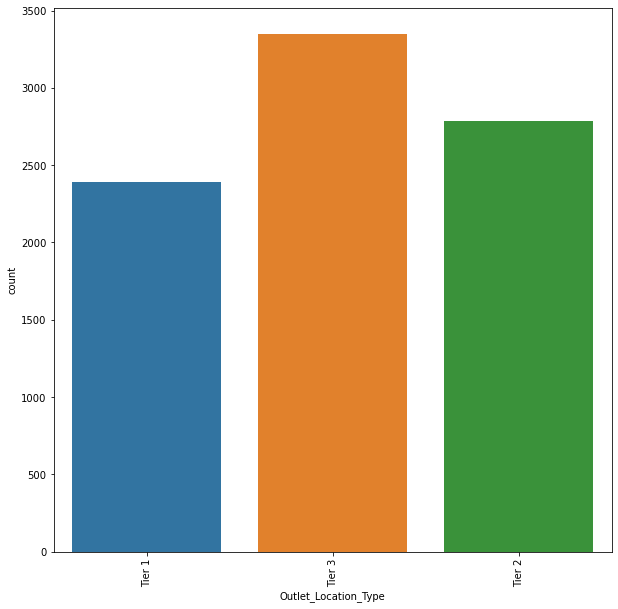

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

In [35]:
countplot(data["Outlet_Location_Type"])

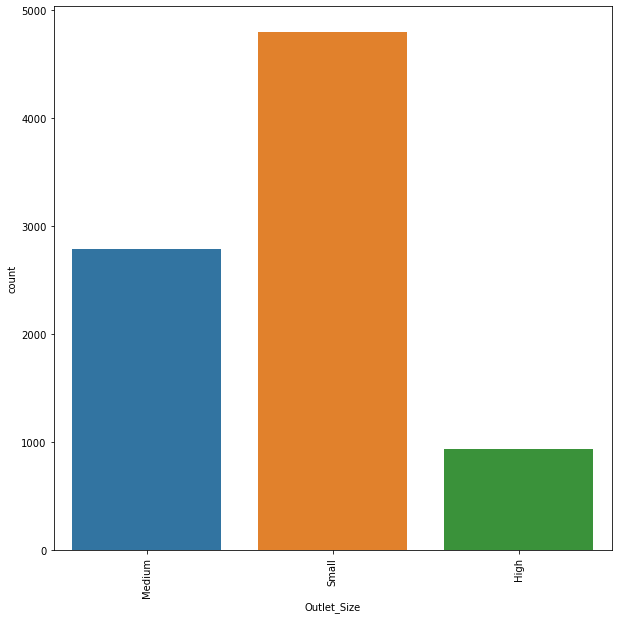

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

In [36]:
countplot(data["Outlet_Size"])

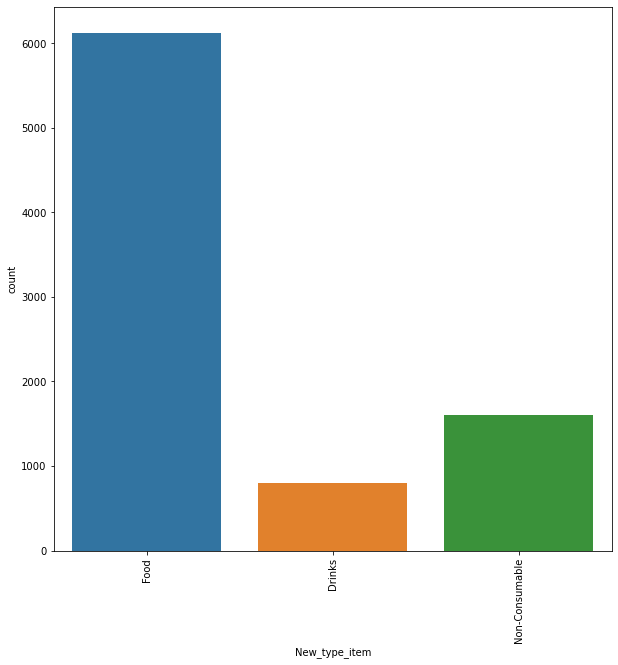

<AxesSubplot:xlabel='New_type_item', ylabel='count'>

In [37]:
countplot(data["New_type_item"])

## APPLYING LABEL ENCODING TO THE DATA :

In [38]:
from sklearn.preprocessing import LabelEncoder

In [39]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_type_item,Outlet_Year
0,FDA15,9.30,Low Fat,0.015920,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,8.225808,Food,14
1,DRC01,5.92,Regular,0.019095,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,6.096776,Drinks,4
2,FDN15,17.50,Low Fat,0.016621,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,7.648868,Food,14
3,FDX07,19.20,Regular,0.064037,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,6.597664,Food,15
4,NCD19,8.93,Non-Edible,0.064037,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,6.903451,Non-Consumable,26


### CHANGE THE CATEGORICAL DATA INTO USEFULL NUMERIC DATA:

In [40]:
le = LabelEncoder()
data["Outlet"] = le.fit_transform(data["Outlet_Identifier"])
cat_col = ["Item_Fat_Content", "Item_Type", "Outlet_Size", "Outlet_Location_Type", "Outlet_Type", "New_type_item"]
for col in cat_col:
    data[col] = le.fit_transform(data[col])

In [41]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_type_item,Outlet_Year,Outlet
0,FDA15,9.30,0,0.015920,4,249.8092,OUT049,1999,1,0,1,8.225808,1,14,9
1,DRC01,5.92,2,0.019095,14,48.2692,OUT018,2009,1,2,2,6.096776,0,4,3
2,FDN15,17.50,0,0.016621,10,141.6180,OUT049,1999,1,0,1,7.648868,1,14,9
3,FDX07,19.20,2,0.064037,6,182.0950,OUT010,1998,2,2,0,6.597664,1,15,0
4,NCD19,8.93,1,0.064037,9,53.8614,OUT013,1987,0,2,1,6.903451,2,26,1


### GET THE DUMMY COLUMN OF THE DATASET:

In [42]:
data = pd.get_dummies(data, columns = ["Item_Fat_Content", "Outlet_Size", "Outlet_Location_Type",
                                       "Outlet_Type", "New_type_item"])
data.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Year,Outlet,...,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,New_type_item_0,New_type_item_1,New_type_item_2
0,FDA15,9.30,0.015920,4,249.8092,OUT049,1999,8.225808,14,9,...,1,0,0,0,1,0,0,0,1,0
1,DRC01,5.92,0.019095,14,48.2692,OUT018,2009,6.096776,4,3,...,0,0,1,0,0,1,0,1,0,0
2,FDN15,17.50,0.016621,10,141.6180,OUT049,1999,7.648868,14,9,...,1,0,0,0,1,0,0,0,1,0
3,FDX07,19.20,0.064037,6,182.0950,OUT010,1998,6.597664,15,0,...,0,0,1,1,0,0,0,0,1,0
4,NCD19,8.93,0.064037,9,53.8614,OUT013,1987,6.903451,26,1,...,0,0,1,0,1,0,0,0,0,1


## MODEL SELECTION

### IMPORT THE USEFULL LIBRARIES FOR REGRESSION PROBLEM: 

In [43]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [44]:
# ASSIGN THE TRAINING AND TESTING DATA TO THE X AND Y VARIABLE:
x = data.drop(columns = ["Item_Identifier", "Outlet_Identifier", "Item_Outlet_Sales", "Outlet_Establishment_Year"])
y = data["Item_Outlet_Sales"]

#### CREATE A FUNCTION TO ACCESS THE MODEL EASILY:

In [45]:
def train(model, x, y):
    
    model.fit(x, y)
    preds = model.predict(x)
    score = model.score(x,y)
    
    cv_score = cross_val_score(model, x, y, scoring = "neg_mean_squared_error",cv = 10)
    cv_score = np.abs(np.mean(cv_score))
    
    print("Model Report")
    print("r_2_score:", score)
    print("MSE:", mean_squared_error(y, preds))
    print("cv_score:", cv_score)

##### LINEAR REGRESSION MODEL SCORE:

Model Report
r_2_score: 0.7205287273929581
MSE: 0.28800445505315264
cv_score: 0.28908418624992754


<AxesSubplot:title={'center':'Model_Selection'}>

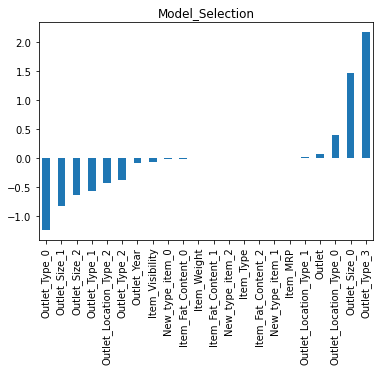

In [46]:
model = LinearRegression()
train(model,x,y)
coeff = pd.Series(model.coef_,x.columns).sort_values()
coeff.plot(kind = "bar", title = "Model_Selection")

##### RANDOM FOREST REGRESSOR MODEL SCORE:

Model Report
r_2_score: 0.9589927634330172
MSE: 0.04225932315167054
cv_score: 0.3075241721201707


<AxesSubplot:title={'center':'Feature_Importance'}>

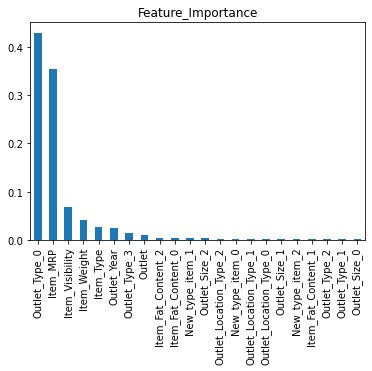

In [47]:
model = RandomForestRegressor()
train(model,x,y)
coeff = pd.Series(model.feature_importances_,x.columns).sort_values(ascending = False)
coeff.plot(kind = "bar", title = "Feature_Importance")

## TILL NOW TRAINING THE MODEL PART IS OVER :

* Training the model part is over, now we need to test the data with the testing dataset. 
* This Random ForestRegressor model gives us the r_2 score 0.9589 so it is a good model to test the data.

## TESTING THE DATA

* we need to do preprocessing steps as same as we done for the training dataset.
* after preprocessing the testing data set we need to do label encoding.
* after finishing these stpes we need to go to test the model and predict the sales for the testing data set.

### IMPORT THE TESTING DATASET:

In [48]:
Data = pd.read_csv("test.csv")
Data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [49]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [50]:
Data.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [51]:
Obj_Col = []
for label,content in data.items():
    if not pd.api.types.is_numeric_dtype(content):
        Obj_Col.append(label)

In [52]:
Obj_Col.remove("Item_Identifier")
Obj_Col.remove('Outlet_Identifier')

In [53]:
Data["Item_Fat_Content"] = Data["Item_Fat_Content"].replace({"LF" : "Low Fat", "reg" : "Regular", "low fat" : "Low Fat"})
Data["Item_Fat_Content"].value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

In [54]:
mean_item_weight_Test = Data.pivot_table(values = "Item_Weight", index = "Item_Identifier")
mean_item_weight_Test


,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [55]:
Missing_Value = Data["Item_Weight"].isnull()
Missing_Value


0       False
1       False
2       False
3       False
4        True
        ...  
5676    False
5677    False
5678    False
5679    False
5680    False
Name: Item_Weight, Length: 5681, dtype: bool

In [56]:
for j,Item in enumerate(Data["Item_Identifier"]):
    if Missing_Value[j]:
        if Item in mean_item_weight_Test:
            Data["Item_Weight"][j] = Data["Item_Weight"].loc[Item]["Item_Weight"]
        else:
            Data["Item_Weight"][j] = np.mean(Data["Item_Weight"])

In [57]:
Data["Item_Weight"].isnull().sum()

0

In [58]:
mode_outlet_size_test = Data.pivot_table(values = "Outlet_Size", columns = "Outlet_Type", aggfunc = (lambda x: x.mode()))
mode_outlet_size_test

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [59]:
Missing_Cat_Values = Data["Outlet_Size"].isnull()
Missing_Cat_Values

0       False
1        True
2        True
3        True
4       False
        ...  
5676    False
5677    False
5678     True
5679     True
5680     True
Name: Outlet_Size, Length: 5681, dtype: bool

In [60]:
Data.loc[Missing_Cat_Values, "Outlet_Size"] = Data.loc[Missing_Cat_Values, "Outlet_Type"].apply(lambda x: mode_outlet_size[x])

In [61]:
Data["Outlet_Size"].isnull().sum()

0

In [62]:
sum(Data["Item_Visibility"] == 0)

353

In [63]:
Data.loc[:, "Item_Visibility"].replace([0], Data["Item_Visibility"].mean(), inplace = True)

In [64]:
sum(Data["Item_Visibility"] == 0)

0

In [65]:
Data["New_type_item"] = Data["Item_Identifier"].apply(lambda x: x[:2])
Data["New_type_item"]

0       FD
1       FD
2       NC
3       FD
4       FD
        ..
5676    FD
5677    FD
5678    NC
5679    FD
5680    FD
Name: New_type_item, Length: 5681, dtype: object

In [66]:
Data["New_type_item"] = Data["New_type_item"].replace({"FD" : "Food", "DR" : "Drinks", "NC" : "Non-Consumable"})
Data["New_type_item"]

0                 Food
1                 Food
2       Non-Consumable
3                 Food
4                 Food
             ...      
5676              Food
5677              Food
5678    Non-Consumable
5679              Food
5680              Food
Name: New_type_item, Length: 5681, dtype: object

In [67]:
Data.loc[Data["New_type_item"] == "Non-Consumable", "Item_Fat_Content"] = "Non-Edible"
Data["Item_Fat_Content"].value_counts()

Low Fat       2581
Regular       2013
Non-Edible    1087
Name: Item_Fat_Content, dtype: int64

In [68]:
Data["Outlet_Year"] = 2013 - Data["Outlet_Establishment_Year"]
Data["Outlet_Year"]

0       14
1        6
2       15
3        6
4       28
        ..
5676    16
5677     4
5678    11
5679     6
5680    11
Name: Outlet_Year, Length: 5681, dtype: int64

In [69]:
LE = LabelEncoder()
Data["Outlet"] = LE.fit_transform(Data["Outlet_Identifier"])
Cat_Col = ["Item_Fat_Content", "Item_Type", "Outlet_Size", "Outlet_Location_Type", "Outlet_Type", "New_type_item"]
for Col in Cat_Col:
    Data[Col] = LE.fit_transform(Data[Col])

In [70]:
Data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,New_type_item,Outlet_Year,Outlet
0,FDW58,20.750000,0,0.007565,13,107.8622,OUT049,1999,1,0,1,1,14,9
1,FDW14,8.300000,2,0.038428,4,87.3198,OUT017,2007,2,1,1,1,6,2
2,NCN55,14.600000,1,0.099575,11,241.7538,OUT010,1998,2,2,0,2,15,0
3,FDQ58,7.315000,0,0.015388,13,155.0340,OUT017,2007,2,1,1,1,6,2
4,FDY38,12.695633,2,0.118599,4,234.2300,OUT027,1985,1,2,3,1,28,5


In [71]:
Data = pd.get_dummies(Data, columns = ["Item_Fat_Content", "Outlet_Size", "Outlet_Location_Type",
                                       "Outlet_Type", "New_type_item"])
Data

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Year,Outlet,Item_Fat_Content_0,...,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,New_type_item_0,New_type_item_1,New_type_item_2
0,FDW58,20.750000,0.007565,13,107.8622,OUT049,1999,14,9,1,...,1,0,0,0,1,0,0,0,1,0
1,FDW14,8.300000,0.038428,4,87.3198,OUT017,2007,6,2,0,...,0,1,0,0,1,0,0,0,1,0
2,NCN55,14.600000,0.099575,11,241.7538,OUT010,1998,15,0,0,...,0,0,1,1,0,0,0,0,0,1
3,FDQ58,7.315000,0.015388,13,155.0340,OUT017,2007,6,2,1,...,0,1,0,0,1,0,0,0,1,0
4,FDY38,12.695633,0.118599,4,234.2300,OUT027,1985,28,5,0,...,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500000,0.013496,13,141.3154,OUT046,1997,16,8,0,...,1,0,0,0,1,0,0,0,1,0
5677,FDD47,7.600000,0.142991,15,169.1448,OUT018,2009,4,3,0,...,0,0,1,0,0,1,0,0,1,0
5678,NCO17,10.000000,0.073529,8,118.7440,OUT045,2002,11,7,0,...,0,1,0,0,1,0,0,0,0,1
5679,FDJ26,15.300000,0.065684,3,214.6218,OUT017,2007,6,2,0,...,0,1,0,0,1,0,0,0,1,0


In [72]:
X = Data.drop(columns = ["Item_Identifier", "Outlet_Identifier", "Outlet_Establishment_Year"])


In [73]:
X

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Year,Outlet,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Outlet_Size_0,...,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,New_type_item_0,New_type_item_1,New_type_item_2
0,20.750000,0.007565,13,107.8622,14,9,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
1,8.300000,0.038428,4,87.3198,6,2,0,0,1,0,...,0,1,0,0,1,0,0,0,1,0
2,14.600000,0.099575,11,241.7538,15,0,0,1,0,0,...,0,0,1,1,0,0,0,0,0,1
3,7.315000,0.015388,13,155.0340,6,2,1,0,0,0,...,0,1,0,0,1,0,0,0,1,0
4,12.695633,0.118599,4,234.2300,28,5,0,0,1,0,...,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,10.500000,0.013496,13,141.3154,16,8,0,0,1,0,...,1,0,0,0,1,0,0,0,1,0
5677,7.600000,0.142991,15,169.1448,4,3,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0
5678,10.000000,0.073529,8,118.7440,11,7,0,1,0,0,...,0,1,0,0,1,0,0,0,0,1
5679,15.300000,0.065684,3,214.6218,6,2,0,0,1,0,...,0,1,0,0,1,0,0,0,1,0


In [74]:
def test(Model, X):
    
    Model.fit(x,y)
    pred_test = Model.predict(X)
    return pred_test


In [75]:
# TESTING THE MODEL WITH RANDOMFORESTREGRESSOR
Model = RandomForestRegressor()
test(Model, X)

array([7.10058993, 7.05078629, 6.42497297, ..., 7.37562706, 8.20377966,
       7.16110444])

##### SAVE THE PREDICTING SALES TO A VARIABLE:

In [76]:
pred_test = Model.predict(X)
pred_test

array([7.10058993, 7.05078629, 6.42497297, ..., 7.37562706, 8.20377966,
       7.16110444])

In [77]:
Data_1 = pd.read_csv("test.csv")


### creating the submission file:

In [78]:
Prediction_Sales = pd.Series(pred_test)
Item_Identifier = pd.Series(Data_1["Item_Identifier"])
Outlet_Identifier = pd.Series(Data_1["Outlet_Identifier"])

In [79]:
Submission_Data = pd.DataFrame({"Item_Identifier" : Item_Identifier, "Outlet_Identifier" : Outlet_Identifier,
                                "Item_Outlet_Sales" : Prediction_Sales})

In [80]:
Prediction_Sales

0       7.100590
1       7.050786
2       6.424973
3       7.552645
4       8.720949
          ...   
5676    7.587207
5677    7.818798
5678    7.375627
5679    8.203780
5680    7.161104
Length: 5681, dtype: float64

In [81]:
Submission_Data

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,7.100590
1,FDW14,OUT017,7.050786
2,NCN55,OUT010,6.424973
3,FDQ58,OUT017,7.552645
4,FDY38,OUT027,8.720949
...,...,...,...
5676,FDB58,OUT046,7.587207
5677,FDD47,OUT018,7.818798
5678,NCO17,OUT045,7.375627
5679,FDJ26,OUT017,8.203780


### visualize the predicting sales data

<AxesSubplot:ylabel='Density'>

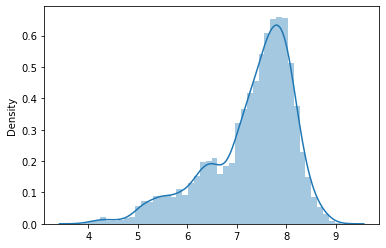

In [82]:
sns.distplot(Prediction_Sales)

## SUBMISSION FILE:

In [83]:
submission_file = Submission_Data.to_csv("Submission_File.csv", index = False)

<AxesSubplot:title={'center':'Feature_Importance'}>

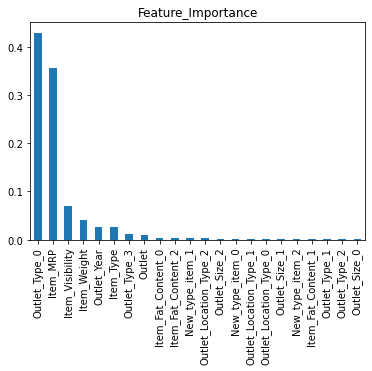

In [84]:
Coeff = pd.Series(Model.feature_importances_,X.columns).sort_values(ascending = False)
Coeff.plot(kind = "bar", title = "Feature_Importance")